# WordVectors

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

seed_ = 20200218
np.random.seed(seed_)
tf.random.set_seed(seed_)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid",
              context="paper",
              font_scale=1.25,
              rc={
                  "figure.figsize": (10.5, 4.5),
                  "figure.dpi": 150,
                  "grid.alpha": 0.1,
                  "grid.color": "#1b262c",
                  "grid.linewidth": 0.5,
                  "font.family": "Operator Mono",
              })
# original first color is #202f66
_30k = ["#3a5b91", "#ff7048", "#7f68d0", "#f3d36e", "#d869ab", "#48ADA9", "#1b262c"]
sns.set_palette(_30k)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import string

import nltk
from nltk.corpus import stopwords
import wordcloud

import gensim
from gensim.models import Word2Vec

In [4]:
stop_words = stopwords.words("english")

In [5]:
from sklearn.decomposition import PCA

# Load Data

In [6]:
train_df = pd.read_csv("./cleaned/train.csv")

In [7]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_new,cleaned_text
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,neutral,and and
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,negative,"Me, ready to go at supermarket during the out..."


# Tekenize sentence

In [8]:
sentences = []
for text in train_df['cleaned_text']:
    sentence = nltk.tokenize.word_tokenize(str(text).lower())
    # clean stop word
    sentence = [word for word in sentence if (word not in stop_words)]
    # clean punct
    sentence = [word for word in sentence if word.isalpha()]
    if len(sentence) > 0:
        sentences.append(sentence)

In [9]:
sentences[:3]

[['advice',
  'talk',
  'neighbours',
  'family',
  'exchange',
  'phone',
  'numbers',
  'create',
  'contact',
  'list',
  'phone',
  'numbers',
  'neighbours',
  'schools',
  'employer',
  'chemist',
  'gp',
  'set',
  'online',
  'shopping',
  'accounts',
  'poss',
  'adequate',
  'supplies',
  'regular',
  'meds',
  'order'],
 ['coronavirus',
  'australia',
  'woolworths',
  'give',
  'elderly',
  'disabled',
  'dedicated',
  'shopping',
  'hours',
  'amid',
  'outbreak'],
 ['food',
  'stock',
  'one',
  'empty',
  'please',
  'panic',
  'enough',
  'food',
  'everyone',
  'take',
  'need',
  'stay',
  'calm',
  'stay',
  'safe']]

In [10]:
len(sentences)

41097

# Word2Vec Model

In [11]:
class MyCallBack(gensim.models.callbacks.CallbackAny2Vec):
    def __init__(self, log_step=10):
        self.epochs = 0
        self.log_step = log_step
        
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epochs != 0 and self.epochs % self.log_step == 0:
            print(f"{self.epochs}:\t{round(loss - self.prev_loss, 2)}")
        self.epochs += 1
        self.prev_loss = loss

In [12]:
num_sentences = 5000

sentences_ = np.random.choice(sentences, replace=False, size=num_sentences).tolist()

sentences_[:3]

[['corg',
  'otc',
  'stock',
  'like',
  'aprn',
  'wtrh',
  'food',
  'delivery',
  'ghost',
  'kitchen'],
 ['property',
  'prices',
  'increase',
  'post',
  'want',
  'sell',
  'land',
  'everything',
  'hold',
  'due',
  'say'],
 ['starting',
  'see',
  'grocery',
  'store',
  'workers',
  'contract',
  'die',
  'think',
  'stores',
  'strict',
  'mask',
  'service',
  'policies',
  'place',
  'enforce']]

In [13]:
# word 2 vec setting

embedding_dims = 32
window_size = 10
max_vocab_size = 3000
min_count = 5

In [14]:
model = Word2Vec(
    sentences=sentences_,
    size=embedding_dims,window=window_size, 
    max_vocab_size=max_vocab_size, 
    min_count=min_count,
    compute_loss=True,
    callbacks=[MyCallBack()]
)

In [15]:
model.get_latest_training_loss()

229928.546875

In [16]:
list(model.wv.vocab.keys())[:10]

['stock',
 'like',
 'food',
 'delivery',
 'prices',
 'increase',
 'want',
 'sell',
 'everything',
 'hold']

## Train Model

In [17]:
train_epochs = 3000

model.train(
    sentences=sentences_, 
    total_examples=model.corpus_count, 
    epochs=train_epochs,
    start_alpha=0.001,
    compute_loss=1, 
    callbacks=[MyCallBack(50)]
)

50:	41713.88
100:	20279.0
150:	31304.5
200:	31192.0
250:	25250.0
300:	25020.0
350:	24688.0
400:	24376.0
450:	24086.0
500:	23951.0
550:	23738.0
600:	20374.0
650:	19880.0
700:	19698.0
750:	19434.0
800:	18974.0
850:	19054.0
900:	19034.0
950:	18994.0
1000:	12634.0
1050:	18722.0
1100:	19086.0
1150:	18986.0
1200:	12504.0
1250:	18630.0
1300:	18588.0
1350:	18540.0
1400:	18684.0
1450:	18394.0
1500:	7900.0
1550:	8224.0
1600:	7900.0
1650:	7924.0
1700:	7964.0
1750:	8092.0
1800:	7888.0
1850:	7556.0
1900:	7588.0
1950:	7792.0
2000:	7976.0
2050:	7716.0
2100:	7656.0
2150:	7712.0
2200:	7848.0
2250:	7676.0
2300:	7776.0
2350:	7980.0
2400:	7828.0
2450:	5328.0
2500:	7784.0
2550:	7956.0
2600:	7672.0
2650:	7556.0
2700:	7900.0
2750:	7560.0
2800:	7832.0
2850:	7648.0
2900:	7416.0
2950:	7252.0


(110509455, 220002000)

## Explore Result

In [18]:
model.save("./outputs/covid-word2vec.model")

In [19]:
np.array(sorted(list(model.wv.vocab.keys())))[:]

array(['able', 'access', 'across', 'act', 'action', 'actually', 'add',
       'advantage', 'advice', 'affect', 'affected', 'ago', 'air', 'aisle',
       'alcohol', 'alert', 'allow', 'allowed', 'almost', 'alone',
       'already', 'also', 'always', 'amazing', 'amazon', 'american',
       'americans', 'amid', 'amidst', 'among', 'amount', 'amp',
       'announced', 'another', 'anyone', 'anything', 'apart', 'app',
       'apparently', 'april', 'arabia', 'area', 'areas', 'around',
       'article', 'asian', 'ask', 'asked', 'asking', 'australia',
       'available', 'average', 'avoid', 'aware', 'away', 'b', 'baby',
       'back', 'bad', 'bag', 'bank', 'banks', 'based', 'basic', 'become',
       'behavior', 'behind', 'believe', 'benefit', 'best', 'better',
       'beyond', 'big', 'bottle', 'bought', 'brands', 'bread', 'breaking',
       'bring', 'british', 'brought', 'business', 'businesses', 'busy',
       'buy', 'buying', 'c', 'ca', 'california', 'call', 'car', 'care',
       'cart', 'case'

In [20]:
model.most_similar('covid')

[('coronavirus', 0.6751353740692139),
 ('countries', 0.569097101688385),
 ('demand', 0.5309261083602905),
 ('national', 0.5219695568084717),
 ('lower', 0.47922608256340027),
 ('novel', 0.4686873257160187),
 ('benefit', 0.46148666739463806),
 ('india', 0.45818910002708435),
 ('continues', 0.45539015531539917),
 ('fears', 0.44877728819847107)]

In [21]:
model.most_similar('sanitizer')

[('hand', 0.7414911985397339),
 ('soap', 0.7407985925674438),
 ('alcohol', 0.6949029564857483),
 ('hands', 0.6280527114868164),
 ('washing', 0.5997336506843567),
 ('sanitizers', 0.5673113465309143),
 ('bottle', 0.5527368187904358),
 ('face', 0.5202052593231201),
 ('using', 0.5083763599395752),
 ('wipes', 0.5021522045135498)]

In [22]:
model.most_similar('alcohol')

[('hand', 0.7171080112457275),
 ('soap', 0.7122159004211426),
 ('sanitizer', 0.6949028372764587),
 ('wipes', 0.60732102394104),
 ('hands', 0.5364012122154236),
 ('bottle', 0.5272758603096008),
 ('washing', 0.5235663652420044),
 ('sell', 0.47474536299705505),
 ('sanitizers', 0.46785497665405273),
 ('resources', 0.46315622329711914)]

In [23]:
model.most_similar(positive=['doctors', 'woman'], negative=['man'])

[('nurses', 0.7639095783233643),
 ('drivers', 0.6703668236732483),
 ('workers', 0.6046469211578369),
 ('clerks', 0.5538270473480225),
 ('worker', 0.5219735503196716),
 ('healthcare', 0.5127167701721191),
 ('hospital', 0.5048482418060303),
 ('medical', 0.5035487413406372),
 ('ppe', 0.4805341958999634),
 ('key', 0.48036712408065796)]

## Export weight

In [24]:
# export vector
vocab = []
vectors = []
for word in list(model.wv.vocab.keys()):
    vocab.append(word)
    vectors.append(model.wv[word])

In [25]:
vec_df = pd.DataFrame(vectors)
word_df = pd.DataFrame(vocab)

In [26]:
vec_df.to_csv("./outputs/vectors.tsv", sep='\t', index=False, header=False)
word_df.to_csv("./outputs/words.tsv", sep='\t', index=False, header=False)

## PCA

In [27]:
pca = PCA(n_components=2)

In [28]:
pca.fit(vec_df)

PCA(n_components=2)

In [29]:
vec_low_d = pca.transform(vec_df)

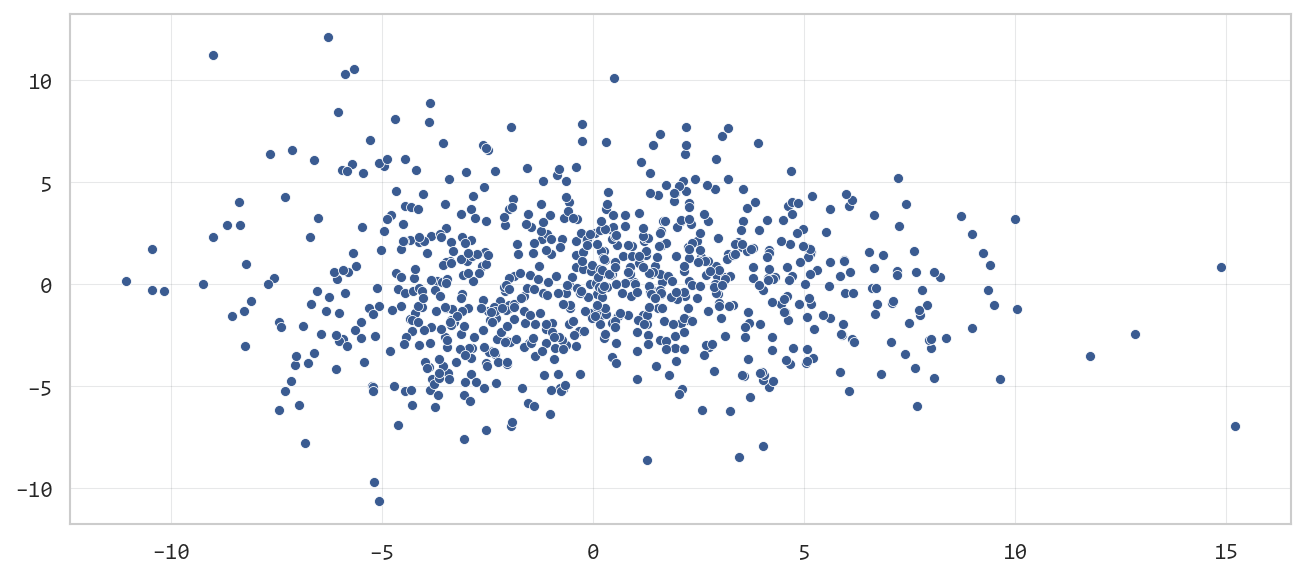

In [30]:
sns.scatterplot(vec_low_d[:, 0], vec_low_d[:, 1])